# Обучение модели

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!nvcc --version
!nvidia-smi

import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:36:24_Pacific_Standard_Time_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0
Thu Feb 27 14:27:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A

In [3]:
from cellpose import io, models, train
import cellpose
io.logger_setup()

2025-02-27 14:27:42,827 [INFO] WRITING LOG OUTPUT TO C:\Users\Danila\.cellpose\run.log
2025-02-27 14:27:42,828 [INFO] 
cellpose version: 	3.1.0 
platform:       	win32 
python version: 	3.10.16 
torch version:  	2.6.0+cu126


(<Logger cellpose.io (INFO)>, WindowsPath('C:/Users/Danila/.cellpose/run.log'))

In [4]:
train_dir = r'D:\neuron\2025-02-13 Cellpose train\Cellpose dataset\train'
test_dir = r'D:\neuron\2025-02-13 Cellpose train\Cellpose dataset\test'

output = io.load_train_test_data(train_dir, test_dir, mask_filter="_seg.npy", look_one_level_down=False)
images, labels, image_names, test_images, test_labels, image_names_test = output

2025-02-27 14:27:42,857 [INFO] not all flows are present, running flow generation for all images
2025-02-27 14:27:49,670 [INFO] 66 / 66 images in D:\neuron\2025-02-13 Cellpose train\Cellpose dataset\train folder have labels
2025-02-27 14:27:49,681 [INFO] not all flows are present, running flow generation for all images
2025-02-27 14:27:52,788 [INFO] 29 / 29 images in D:\neuron\2025-02-13 Cellpose train\Cellpose dataset\test folder have labels


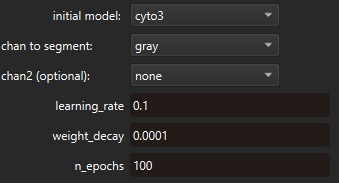

In [13]:
model = models.CellposeModel(gpu=True, pretrained_model="transformer_cp3", nchan=3, backbone='transformer')

2025-02-27 19:03:06,599 [INFO] >> transformer_cp3 << model set to be used
2025-02-27 19:03:07,547 [INFO] ** TORCH CUDA version installed and working. **
2025-02-27 19:03:07,549 [INFO] >>>> using GPU (CUDA)
2025-02-27 19:03:09,783 [INFO] >>>> loading model C:\Users\Danila\.cellpose\models\transformer_cp3
2025-02-27 19:03:10,484 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


In [14]:
epochs = 1000

model_path, train_losses, test_losses = train.train_seg(
    model.net,
    train_data=images,
    train_labels=labels,
    channels=[0, 0, 0],
    normalize=True,
    test_data=test_images,
    test_labels=test_labels,
    weight_decay=1e-4,
    SGD=False, # а может лучше Адам?
    batch_size=8,
    learning_rate=0.1, # как влияет?
    n_epochs=epochs,
    model_name="deform_2025_02_ep400_lr0_1_WAdam_transformer",
    save_path=r"C:\Users\Danila\Desktop\2025-02-27-Transformer train\Models",
    save_every=100
)

2025-02-27 19:04:51,494 [INFO] computing flows for labels


100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [01:28<00:00,  1.34s/it]

2025-02-27 19:06:20,549 [INFO] computing flows for labels



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:32<00:00,  1.11s/it]

2025-02-27 19:06:53,076 [INFO] >>> computing diameters



100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 82.37it/s]

2025-02-27 19:06:54,375 [INFO] >>> using channels [0, 0, 0]
2025-02-27 19:06:54,375 [INFO] >>> normalizing {'lowhigh': None, 'percentile': None, 'normalize': True, 'norm3D': True, 'sharpen_radius': 0, 'smooth_radius': 0, 'tile_norm_blocksize': 0, 'tile_norm_smooth3D': 1, 'invert': False}


2025-02-27 19:07:16,559 [INFO] >>> n_epochs=400, n_train=66, n_test=29
2025-02-27 19:07:16,560 [INFO] >>> AdamW, learning_rate=0.10000, weight_decay=0.00010
2025-02-27 19:07:16,607 [INFO] >>> saving model to C:\Users\Danila\Desktop\2025-02-27-Transformer train\Models\models\deform_2025_02_ep400_lr0_1_WAdam_transformer
2025-02-27 19:07:38,873 [INFO] 0, train_loss=1.5620, test_loss=1.0911, LR=0.000000, time 22.27s
2025-02-27 19:08:14,930 [INFO] 5, train_loss=0.7263, test_loss=0.5801, LR=0.055556, time 58.33s
2025-02-27 19:08:50,907 [INFO] 10, train_loss=0.5472, test_loss=0.4861, LR=0.100000, time 94.31s
2025-02-27 19:09:56,191 [INFO] 20, train_loss=0.7416, test_loss=0.4815, LR=0.100000, time 159.59s
2025-02-27 19:11:01,182 [INFO] 30, train_loss=0.5747, test_loss=0.4832, LR=0.100000, time 224.58s
2025-02-27 19:12:03,966 [INFO] 40, train_loss=0.5322, test_loss=0.3868, LR=0.100000, time 287.36s
2025-02-27 19:13:06,893 [INFO] 50, train_loss=0.5061, test_loss=0.3902, LR=0.100000, time 350.29s

In [ ]:
plt.plot(np.arange(1, epochs+1), train_losses)
plt.plot(np.arange(1, epochs+1, 10), test_losses[::10])
plt.xlabel('Номер эпохи')
plt.ylabel('Loss')
plt.title('Кривая обучения Cellpose transformer (5000 эпох, lr=0.1, SGD)')
plt.legend(['train', 'test'])
plt.show()

## Метрики

In [11]:
from tqdm import tqdm
from scipy.ndimage import convolve


def boundary_scores(masks_true, masks_pred, scales):
    """
    Calculate boundary precision, recall, and F-score.

    Args:
        masks_true (list): List of true masks.
        masks_pred (list): List of predicted masks.
        scales (list): List of scales.

    Returns:
        tuple: A tuple containing precision, recall, and F-score arrays.
    """
    diams = [utils.diameters(lbl)[0] for lbl in masks_true]
    precision = np.zeros((len(scales), len(masks_true)))
    recall = np.zeros((len(scales), len(masks_true)))
    fscore = np.zeros((len(scales), len(masks_true)))
    for j, scale in enumerate(scales):
        for n in tqdm(range(len(masks_true))):
            diam = max(1, scale * diams[n])
            rs, ys, xs = utils.circleMask([int(np.ceil(diam)), int(np.ceil(diam))])
            filt = (rs <= diam).astype(np.float32)
            otrue = utils.masks_to_outlines(masks_true[n])
            otrue = convolve(otrue, filt)
            opred = utils.masks_to_outlines(masks_pred[n])
            opred = convolve(opred, filt)
            tp = np.logical_and(otrue == 1, opred == 1).sum()
            fp = np.logical_and(otrue == 0, opred == 1).sum()
            fn = np.logical_and(otrue == 1, opred == 0).sum()
            precision[j, n] = tp / (tp + fp)
            recall[j, n] = tp / (tp + fn)
        fscore[j] = 2 * precision[j] * recall[j] / (precision[j] + recall[j])
    return precision, recall, fscore


def test_model(model_path, train_images, train_labels, test_images, test_labels):
    model = models.CellposeModel(gpu=True, pretrained_model=model_path, nchan=3, backbone='transformer')
    model_name = os.path.basename(model_path)
    
    train_eval, flows, styles = model.eval(train_images, channels=[0,0,0])
    test_eval, flows, styles = model.eval(test_images, channels=[0,0,0])

    print()
    print(model_name)
    print()
    
    aji_train = cellpose.metrics.aggregated_jaccard_index(train_labels, train_eval).mean()
    print(f"Aggregated jaccard index (train): {aji_train:.3f}")
    aji_test = cellpose.metrics.aggregated_jaccard_index(test_labels, test_eval).mean()
    print(f"Aggregated jaccard index (test): {aji_test:.3f}")
    print()

    ap_train = cellpose.metrics.average_precision(train_labels, train_eval)
    print("Average precision (train)")
    print(f"threshold 0.5: {ap_train[0][:,0].mean():.3f}")
    print(f"threshold 0.75): {ap_train[0][:,1].mean():.3f}")
    print(f"threshold 0.9): {ap_train[0][:,2].mean():.3f}")

    ap_test = cellpose.metrics.average_precision(test_labels, test_eval)
    print("Average precision (test)")
    print(f"threshold 0.5: {ap_test[0][:,0].mean():.3f}")
    print(f"threshold 0.75): {ap_test[0][:,1].mean():.3f}")
    print(f"threshold 0.9): {ap_test[0][:,2].mean():.3f}")
    print()

    bs_train = boundary_scores(train_labels, train_eval, scales=[0.1])
    print("Boundary scores for (train, scale=0.1)")
    print("precision", bs_train[0].mean())
    print("recall", bs_train[1].mean())
    print("fscore", bs_train[2].mean())

    bs_test = boundary_scores(test_labels, test_eval, scales=[0.1])
    print("Boundary scores for (test, scale=0.1)")
    print("precision", bs_test[0].mean())
    print("recall", bs_test[1].mean())
    print("fscore", bs_test[2].mean())

In [12]:
test_model(
    model_path = r'C:\Users\Danila\Desktop\2025-02-27-Transformer train\Models\models\deform_2025_02_ep5000_lr0_1_SGD_transformer',
    train_images = images,
    train_labels = labels,
    test_images = test_images,
    test_labels = test_labels
)

2025-02-27 18:33:30,350 [INFO] ** TORCH CUDA version installed and working. **
2025-02-27 18:33:30,350 [INFO] >>>> using GPU (CUDA)
2025-02-27 18:33:33,150 [INFO] >>>> loading model C:\Users\Danila\Desktop\2025-02-27-Transformer train\Models\models\deform_2025_02_ep5000_lr0_1_SGD_transformer
2025-02-27 18:33:33,887 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2025-02-27 18:33:33,887 [INFO] >>>> model diam_labels =  102.889 (mean diameter of training ROIs)
2025-02-27 18:33:33,890 [INFO] 0%|          | 0/66 [00:00<?, ?it/s]


C:\Users\Danila\anaconda3\envs\cellpose\lib\site-packages\cellpose\core.py:275: RuntimeWarning: invalid value encountered in divide
  stylei /= (stylei**2).sum()**0.5
C:\Users\Danila\anaconda3\envs\cellpose\lib\site-packages\cellpose\core.py:275: RuntimeWarning: invalid value encountered in divide
  stylei /= (stylei**2).sum()**0.5


2025-02-27 18:37:31,958 [INFO] 100%|##########| 29/29 [01:06<00:00,  2.28s/it]

deform_2025_02_ep5000_lr0_1_SGD_transformer

Aggregated jaccard index (train): 0.752
Aggregated jaccard index (test): 0.754

Average precision (train)
threshold 0.5: 0.779
threshold 0.75): 0.753
threshold 0.9): 0.409
Average precision (test)
threshold 0.5: 0.784
threshold 0.75): 0.768
threshold 0.9): 0.414



100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [03:14<00:00,  2.94s/it]


Boundary scores for (train, scale=0.1)
precision 0.7876004171619666
recall 0.8009842222441563
fscore 0.7883589195189189


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:21<00:00,  2.81s/it]

Boundary scores for (test, scale=0.1)
precision 0.7982589073997071
recall 0.7954750451175638
fscore 0.7907101805206218


In [15]:
test_model(
    model_path = r'C:\Users\Danila\Desktop\2025-02-27-Transformer train\Models\models\deform_2025_02_ep400_lr0_1_WAdam_transformer',
    train_images = images,
    train_labels = labels,
    test_images = test_images,
    test_labels = test_labels
)

2025-02-27 19:52:30,535 [INFO] ** TORCH CUDA version installed and working. **
2025-02-27 19:52:30,535 [INFO] >>>> using GPU (CUDA)
2025-02-27 19:52:33,013 [INFO] >>>> loading model C:\Users\Danila\Desktop\2025-02-27-Transformer train\Models\models\deform_2025_02_ep400_lr0_1_WAdam_transformer
2025-02-27 19:52:33,640 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2025-02-27 19:52:33,642 [INFO] >>>> model diam_labels =  102.889 (mean diameter of training ROIs)
2025-02-27 19:52:33,642 [INFO] 0%|          | 0/66 [00:00<?, ?it/s]


C:\Users\Danila\anaconda3\envs\cellpose\lib\site-packages\cellpose\core.py:275: RuntimeWarning: invalid value encountered in divide
  stylei /= (stylei**2).sum()**0.5


2025-02-27 19:56:17,949 [INFO] 100%|##########| 29/29 [01:06<00:00,  2.30s/it]

deform_2025_02_ep400_lr0_1_WAdam_transformer

Aggregated jaccard index (train): 0.587
Aggregated jaccard index (test): 0.624

Average precision (train)
threshold 0.5: 0.611
threshold 0.75): 0.494
threshold 0.9): 0.220
Average precision (test)
threshold 0.5: 0.663
threshold 0.75): 0.546
threshold 0.9): 0.239



100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [03:02<00:00,  2.77s/it]


Boundary scores for (train, scale=0.1)
precision 0.735460085422082
recall 0.6078666079639423
fscore 0.648744171792572


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:23<00:00,  2.87s/it]

Boundary scores for (test, scale=0.1)
precision 0.7598638835282959
recall 0.6287452449541149
fscore 0.6767092464385452


# Обработка даных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm.notebook import tqdm, trange
import seaborn as sns
from PIL import Image
from scipy.stats import gaussian_kde
# from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from cellpose.io import imread

In [ ]:
def get_patient_file_paths(path, ftype='.tif'):
    return [os.path.join(path, file) for file in os.listdir(path) if ftype in file]


def filter_data(data, percent=0.01):
    # Определяем границы квантилей
    lower_quantile = percent/2  # Нижний квантиль
    upper_quantile = 1 - percent/2  # Верхний квантиль

    # Рассчитаем значения квантилей
    lower_threshold = np.quantile(data, lower_quantile)  # Квантиль percent/2
    upper_threshold = np.quantile(data, upper_quantile)  # Квантиль 1-percent/2

    # Отфильтруем точки, принадлежащие квантилю percent/2 – 1-percent/2
    filtered_data = data[(data >= lower_threshold) & (data <= upper_threshold)]
    return filtered_data


def analyse_patient(files, model, scale=1/14.4, percent=0.01):
    # cell_count = 0
    widths = []
    lengths = []
    areas = []
    DI1 = []
    DI2 = []

    for file in files:
        # обработка изображений
        imgs = [imread(file)]
        masks, flows, styles = model.eval(imgs, diameter=105, channels=[0,0])
        masks = masks[0]
        # masks = np.asarray(masks)
        # cell_count += masks.max()

        # нахождение контуров
        for i in range(1, masks.max()+1):
            mask = masks.copy()
            mask[mask != i] = 0
            mask[mask == i] = 1
            mask = np.array(mask, np.uint8)
            _, contour, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #находим контуры
            cnt = contour[0]
            try:
                ellipse = cv2.fitEllipse(cnt) # проверка, достаточно ли точек
            except Exception:
                # cell_count -= 1
                continue
            L = max(ellipse[1]) * scale
            W = min(ellipse[1]) * scale
            if W <= 0:
                continue
            areas.append(cv2.contourArea(cnt) * scale**2)
            lengths.append(L)
            widths.append(W)
            DI1.append(L/W)
            DI2.append((L-W)/(L+W))
    # фильтруем клетки, которые редко попадаются
    lengths = filter_data(np.array(lengths), percent=percent)
    areas = filter_data(np.array(areas), percent=percent)
    DI1 = filter_data(np.array(DI1), percent=percent)
    DI2 = filter_data(np.array(DI2), percent=percent)
    # print('Среднее ', np.mean(DI2))
    # print('Дисперсия ', np.std(DI2))
    # print('Ширина ', fwhm(*kde_plot(DI2)))
    # print('КБ ', bimodality_coefficient(DI2))
    # print('КC ', calc_silhouette_score(DI2))
    cell_count = len(lengths)
    return cell_count, lengths, areas, DI1, DI2


def draw_data(data, bw_scale=1, points=10000):
    # calculate the optimal bandwidth using Silverman's rule
    std_dev = np.std(data)
    bandwidth = 1.06 * std_dev * len(data) ** (-1/5) * bw_scale

    plot_x = np.linspace(np.min(data), np.max(data), points)
    kde = gaussian_kde(data, bw_method=bandwidth/std_dev)
    pdf = kde.pdf(plot_x)
    plt.plot(plot_x, pdf)


def kde_plot(data, bw_scale=1, points=10000):
    std_dev = np.std(data)
    bandwidth = 1.06 * std_dev * len(data) ** (-1/5) * bw_scale

    plot_x = np.linspace(np.min(data), np.max(data), points)
    kde = gaussian_kde(data, bw_method=bandwidth/std_dev)
    pdf = kde.pdf(plot_x)
    return plot_x, pdf


def fwhm(x, y):
    max_y = np.max(y)  # Значение максимума
    half_max = max_y / 2  # Половина от максимума

    # Находим индексы, где функция пересекает половину максимума
    indices = np.where(y >= half_max)[0]  # Все индексы, где y >= half_max
    x_left = x[indices[0]]  # Первая точка пересечения (левая граница)
    x_right = x[indices[-1]]  # Последняя точка пересечения (правая граница)

    # Вычисляем FWHM
    fwhm = abs(x_right - x_left)
    return fwhm


def bimodality_coefficient(data):
    """
    Рассчитывает коэффициент унимодальности/бимодальности (Bimodality Coefficient, BC).

    Для унимодальных распределений BC < 0.55, для бимодальных — BC >= 0.55.

    Параметры:
        data (array-like): Набор значений случайной величины.

    Возвращает:
        float: Коэффициент бимодальности.
    """
    # Размер выборки
    n = len(data)

    # Коэффициенты асимметрии и эксцесса
    gamma = skew(data)  # Асимметрия
    kappa = kurtosis(data, fisher=True)  # Эксцесс (Fisher: относительно нормального распределения)

    # Коэффициент бимодальности
    bc = (gamma**2 + 1) / (kappa + 3 * ((n - 1)**2) / ((n - 2) * (n - 3)))

    return bc


def calc_silhouette_score(data):
    kmeans = KMeans(n_clusters=2, random_state=42)
    return silhouette_score(data.reshape(-1,1), kmeans.fit_predict(data.reshape(-1,1)))

In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/Deform/models/deform_2025_02'
model = models.CellposeModel(gpu=True, pretrained_model=model_path, nchan=2)

/usr/local/lib/python3.11/dist-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, map_location=device)


In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Deform/Cellpose train dataset 3'

database = {}
DIs = []
Means = []
STDs = []
Whids = []
KBs = []
KCs = []

for day in tqdm(sorted(os.listdir(data_path))):
    print(day)
    day_path = os.path.join(data_path, day)
    database[day] = {}

    for patient in sorted(filter(lambda x: os.path.isdir(os.path.join(day_path, x)), os.listdir(day_path))):
        print(f'  {patient}')
        database[day][patient] = {}

        patient_path = os.path.join(day_path, patient)
        file_paths = get_patient_file_paths(patient_path, ftype='.png')
        _, _, _, _, DI = analyse_patient(file_paths, model)
        DIs.append(DI)

        database[day][patient]['Среднее'] = np.mean(DI)
        database[day][patient]['Дисперсия'] = np.std(DI)
        database[day][patient]['Ширина'] = fwhm(*kde_plot(DI))
        database[day][patient]['КБ'] = bimodality_coefficient(DI)
        database[day][patient]['КC'] = calc_silhouette_score(DI)

        Means.append(database[day][patient]['Среднее'])
        STDs.append(database[day][patient]['Дисперсия'])
        Whids.append(database[day][patient]['Ширина'])
        KBs.append(database[day][patient]['КБ'])
        KCs.append(database[day][patient]['КC'])

        print(f"    Среднее: {database[day][patient]['Среднее']:0.3f}")

        draw_data(DI)
        plt.title(f'Пациент №{patient} от {day}\nФункция распределения ИДЭ')
        plt.xlabel('Индекс деформируемости')
        plt.ylabel('Плотность вероятности')
        plt.legend([f"(КБ = {database[day][patient]['КБ']:0.2f}, КС = {database[day][patient]['КC']:0.2f})"])
        plt.savefig(os.path.join(day_path, f"Пациент №{patient} от {day}.png"))
        plt.clf()

  0%|          | 0/9 [00:00<?, ?it/s]

2024-11-27-flow chamber
  1
    Среднее: 0.186
  2
    Среднее: 0.130
  3
    Среднее: 0.177
2024-11-28-flow chamber
  1
    Среднее: 0.218
2024-12-04-flow chamber
  1
    Среднее: 0.152
  2
    Среднее: 0.164
  3
    Среднее: 0.167
  4
    Среднее: 0.194
2024-12-18-flow chamber
  1
    Среднее: 0.126
  2
    Среднее: 0.148
  3
    Среднее: 0.190
2025-01-15-flow chamber
  1
    Среднее: 0.146
  2
    Среднее: 0.097
  3
    Среднее: 0.118
2025-01-22-flow chamber
  1
    Среднее: 0.109
  2
    Среднее: 0.102
  3
    Среднее: 0.154
  4
    Среднее: 0.173
2025-01-29-flow chamber
  1
    Среднее: 0.162
  2
    Среднее: 0.192
  3
    Среднее: 0.211
  4
    Среднее: 0.204
2025-01-30-flow chamber
  1
    Среднее: 0.117
  2
    Среднее: 0.119
2025-01-31-flow chamber
  1
    Среднее: 0.136
  2
    Среднее: 0.155
  3
    Среднее: 0.171
  4
    Среднее: 0.162


<Figure size 640x480 with 0 Axes>

In [ ]:
import json

print(json.dumps(database, indent=4, sort_keys=True, ensure_ascii=False))

{
    "2024-11-27-flow chamber": {
        "1": {
            "Дисперсия": 0.06388784980114122,
            "КC": 0.5306280618167725,
            "КБ": 0.30652060590250835,
            "Среднее": 0.18626956236039374,
            "Ширина": 0.1301739529556169
        },
        "2": {
            "Дисперсия": 0.058070877975535444,
            "КC": 0.5550387248927875,
            "КБ": 0.3619097807918915,
            "Среднее": 0.13014646722169076,
            "Ширина": 0.1490635016918263
        },
        "3": {
            "Дисперсия": 0.08229728216609804,
            "КC": 0.5787034902860647,
            "КБ": 0.419494448293361,
            "Среднее": 0.17710305536801305,
            "Ширина": 0.2247746908526448
        }
    },
    "2024-11-28-flow chamber": {
        "1": {
            "Дисперсия": 0.06276136402128782,
            "КC": 0.5360145744259434,
            "КБ": 0.31193789612277417,
            "Среднее": 0.2180680446494896,
            "Ширина": 0.14281949861794352
   

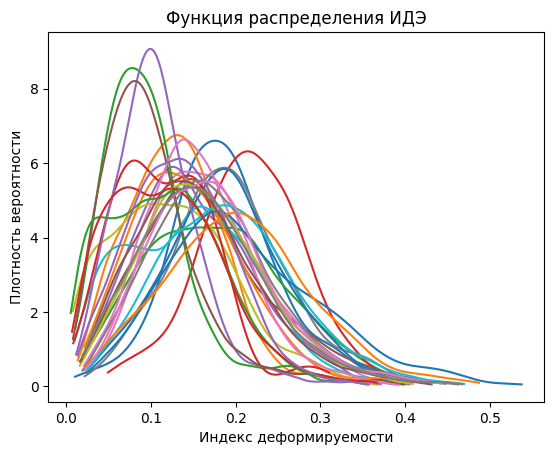

In [ ]:
for DI in DIs:
    draw_data(DI)
plt.title(f'Функция распределения ИДЭ')
plt.xlabel('Индекс деформируемости')
plt.ylabel('Плотность вероятности')
plt.show()

[0.18626956236039374, 0.13014646722169076, 0.17710305536801305, 0.2180680446494896, 0.15243969451089082, 0.1642695710914168, 0.16704565365210247, 0.19367738007820165, 0.12591412209222796, 0.14752220635258628, 0.18952170046066638, 0.14553439335282825, 0.09679024784076734, 0.11775078593889492, 0.10880150427899164, 0.10150119670203042, 0.15378461026380214, 0.1730985202945484, 0.16232144995856282, 0.19196063537293853, 0.21108633877907337, 0.2036699736290873, 0.11657846822087947, 0.11886486196018123, 0.13559052623962226, 0.15545111767139538, 0.17147142031389812, 0.16233176871074853]


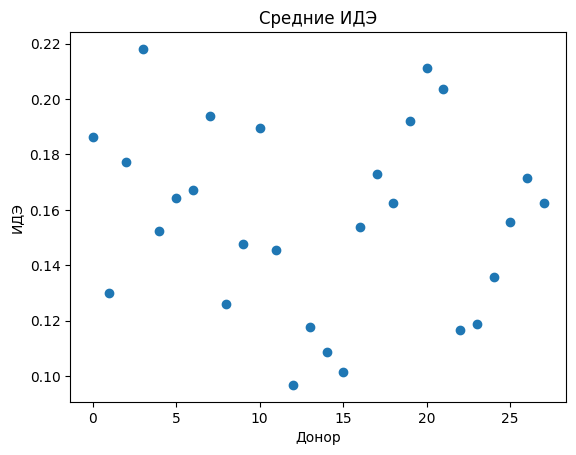

In [ ]:
print(Means)

plt.scatter(range(len(Means)), Means)
plt.title(f'Средние ИДЭ')
plt.xlabel('Донор')
plt.ylabel('ИДЭ')
plt.show()

[0.06388784980114122, 0.058070877975535444, 0.08229728216609804, 0.06276136402128782, 0.06827015291693739, 0.07731629514700304, 0.0662335244365041, 0.07242326399522542, 0.07175832169431383, 0.07632141163356596, 0.07311883262928764, 0.0681919788751777, 0.05418013862813721, 0.05867493854128135, 0.05214454103240795, 0.06130114857020051, 0.06230763138983241, 0.07543819770726719, 0.07266425709669827, 0.0801059785592434, 0.09269844870471136, 0.08617540046074029, 0.06713274887419829, 0.06697195619736457, 0.06042759667796681, 0.07385064222057179, 0.07380419980895953, 0.07689454260917662]


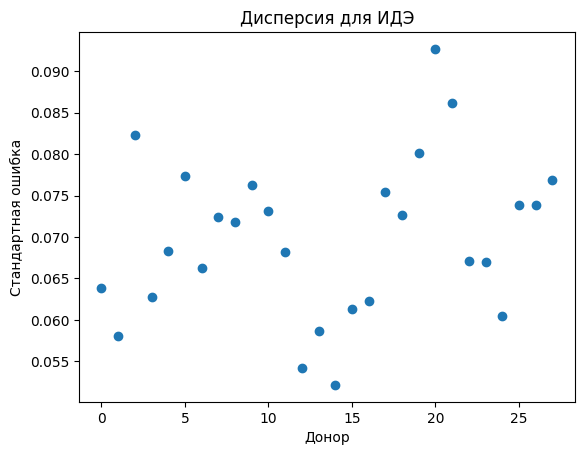

In [ ]:
print(STDs)

plt.scatter(range(len(STDs)), STDs)
plt.title(f'Дисперсия для ИДЭ')
plt.xlabel('Донор')
plt.ylabel('Стандартная ошибка')
plt.show()

[0.1301739529556169, 0.1490635016918263, 0.2247746908526448, 0.14281949861794352, 0.16394879477199872, 0.15818039573037715, 0.15597209526928435, 0.14877473361051566, 0.20028220360328303, 0.2212496455931604, 0.15140890695046783, 0.16493631278497398, 0.10483389196875083, 0.16130634076662775, 0.10183944591502195, 0.10927083409918778, 0.14318500645476484, 0.16582764625644567, 0.1740860742896827, 0.1921149263290381, 0.19819505051519243, 0.1959102084722531, 0.1895914494369205, 0.18093193775241492, 0.15894918278484127, 0.17385912984999732, 0.1661672485498867, 0.17507815637198149]


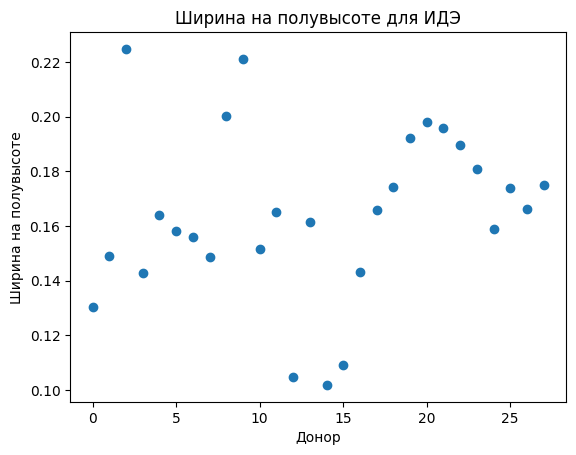

In [ ]:
print(Whids)

plt.scatter(range(len(Whids)), Whids)
plt.title(f'Ширина на полувысоте для ИДЭ')
plt.xlabel('Донор')
plt.ylabel('Ширина на полувысоте')
plt.show()

[0.30652060590250835, 0.3619097807918915, 0.419494448293361, 0.31193789612277417, 0.42537181639960153, 0.4516606446771438, 0.4118669122098073, 0.35383337301741485, 0.4356123807753205, 0.42533927619699263, 0.35252058621856913, 0.40596542971379407, 0.5336063907637248, 0.4063215154649389, 0.40834913693928576, 0.5267550642744887, 0.3730953578363708, 0.39284343942678474, 0.405785602056401, 0.38685685009786747, 0.4331408429705407, 0.36786784319581445, 0.42721221257403863, 0.4295586080480422, 0.382106719180521, 0.41966148051929414, 0.40506382029781446, 0.3983415640983653]


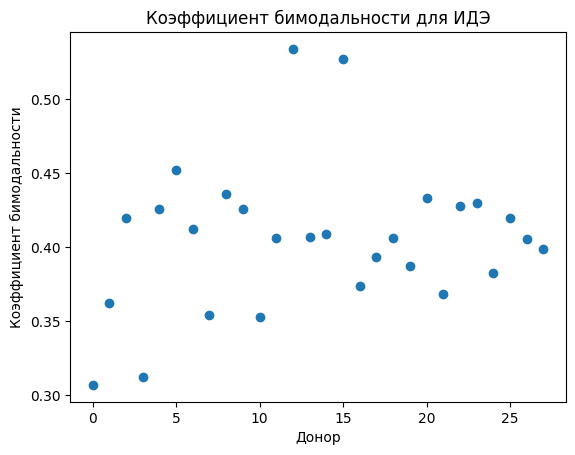

In [ ]:
print(KBs)

plt.scatter(range(len(KBs)), KBs)
plt.title(f'Коэффициент бимодальности для ИДЭ')
plt.xlabel('Донор')
plt.ylabel('Коэффициент бимодальности')
plt.show()

[0.5306280618167725, 0.5550387248927875, 0.5787034902860647, 0.5360145744259434, 0.5935839812304852, 0.5813465136755159, 0.5586941603363063, 0.5364219619132137, 0.5802203558828866, 0.5790768065637465, 0.5328251842218459, 0.5687838661032152, 0.6254311710631922, 0.611512548996729, 0.5593091313466043, 0.6180272134297423, 0.5557967337387814, 0.5564526952290012, 0.5657362412379069, 0.5581662386585047, 0.5862174748538032, 0.5477404125792825, 0.5824837579405038, 0.5793750531179058, 0.5674482155635178, 0.5669209256266861, 0.5539718827734434, 0.5587608582608599]


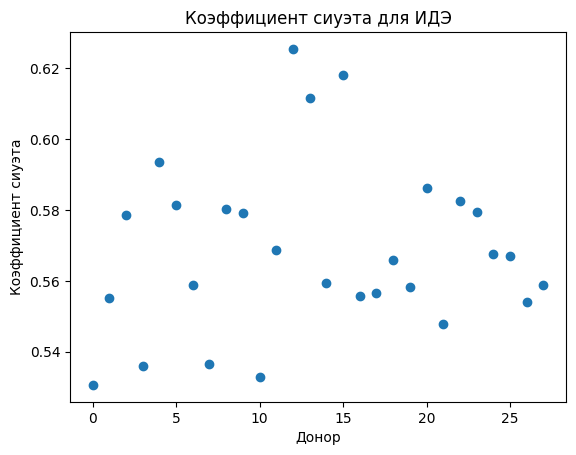

In [ ]:
print(KCs)

plt.scatter(range(len(KCs)), KCs)
plt.title(f'Коэффициент сиуэта для ИДЭ')
plt.xlabel('Донор')
plt.ylabel('Коэффициент сиуэта')
plt.show()

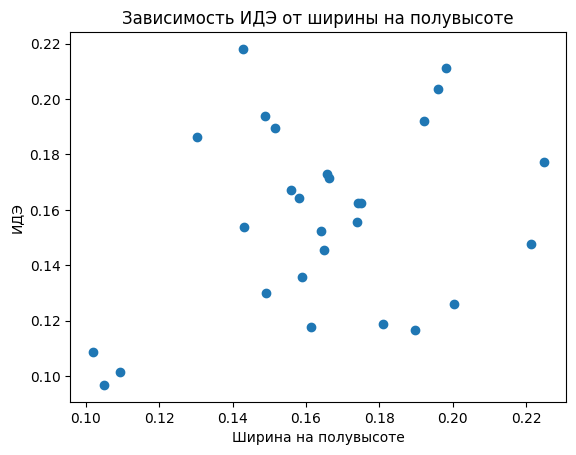

In [ ]:
plt.scatter(Whids, Means)
plt.title(f'Зависимость ИДЭ от ширины на полувысоте')
plt.xlabel('Ширина на полувысоте')
plt.ylabel('ИДЭ')
plt.show()

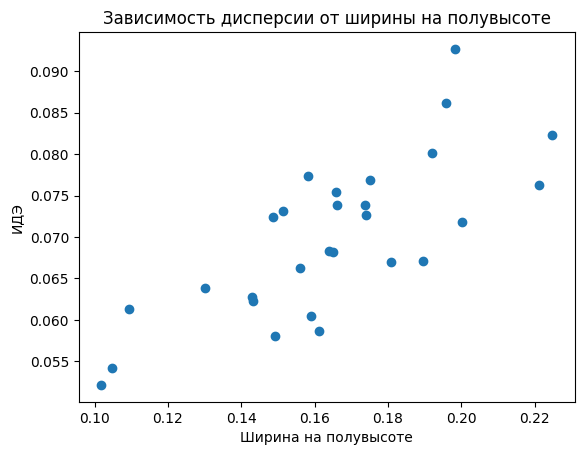

In [ ]:
plt.scatter(Whids, STDs)
plt.title(f'Зависимость дисперсии от ширины на полувысоте')
plt.xlabel('Ширина на полувысоте')
plt.ylabel('ИДЭ')
plt.show()

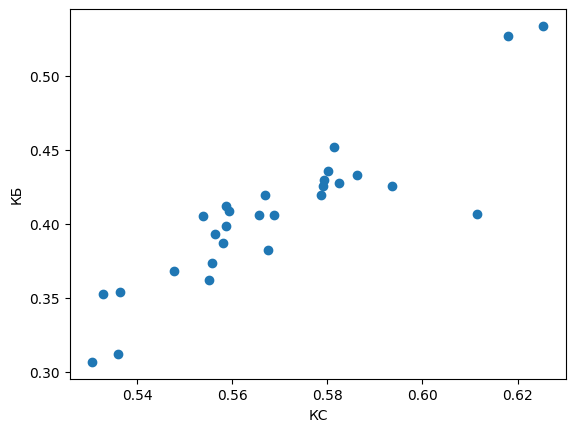

In [ ]:
plt.scatter(KCs, KBs)
plt.title(f'')
plt.xlabel('КС')
plt.ylabel('КБ')
plt.show()

In [ ]:
plt.scatter(KCs, KBs)
plt.title(f'')
plt.xlabel('КС')
plt.ylabel('КБ')
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

In [ ]:
%matplotlib inline

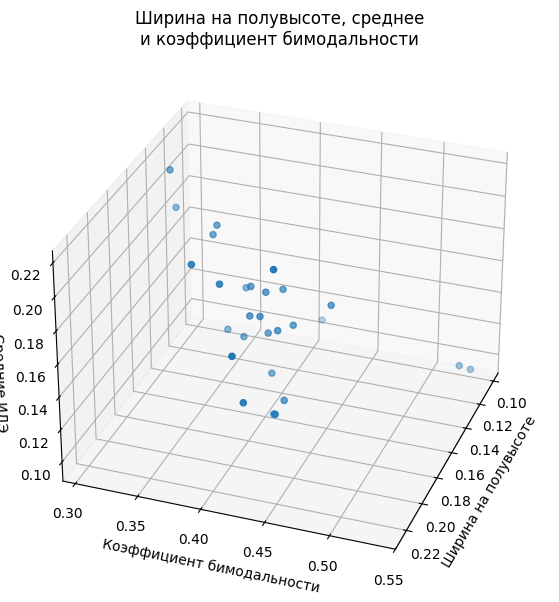

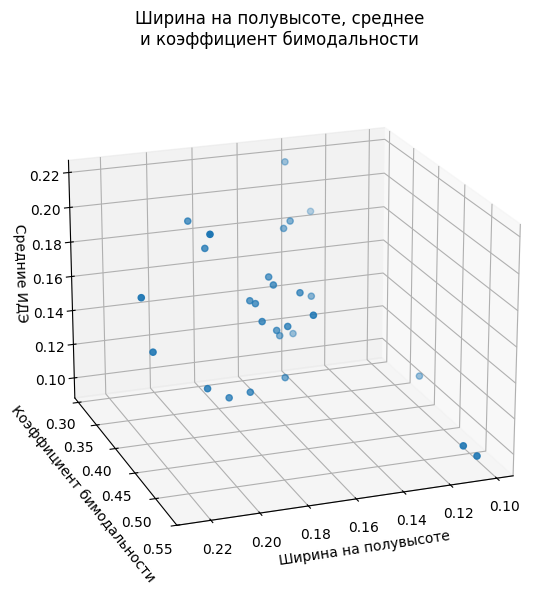

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(Whids, KBs, Means)
ax.view_init(30, 20)
plt.title(f'Ширина на полувысоте, среднее\nи коэффициент бимодальности')
plt.xlabel('Ширина на полувысоте')
plt.ylabel('Коэффициент бимодальности')
ax.set_zlabel("Средние ИДЭ")
plt.show()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(Whids, KBs, Means)
ax.view_init(20, 70)
plt.title(f'Ширина на полувысоте, среднее\nи коэффициент бимодальности')
plt.xlabel('Ширина на полувысоте')
plt.ylabel('Коэффициент бимодальности')
ax.set_zlabel("Средние ИДЭ")
plt.show()

In [2]:
Whids = [0.1301739529556169, 0.1490635016918263, 0.2247746908526448, 0.14281949861794352, 0.16394879477199872, 0.15818039573037715, 0.15597209526928435, 0.14877473361051566, 0.20028220360328303, 0.2212496455931604, 0.15140890695046783, 0.16493631278497398, 0.10483389196875083, 0.16130634076662775, 0.10183944591502195, 0.10927083409918778, 0.14318500645476484, 0.16582764625644567, 0.1740860742896827, 0.1921149263290381, 0.19819505051519243, 0.1959102084722531, 0.1895914494369205, 0.18093193775241492, 0.15894918278484127, 0.17385912984999732, 0.1661672485498867, 0.17507815637198149]
KBs = [0.30652060590250835, 0.3619097807918915, 0.419494448293361, 0.31193789612277417, 0.42537181639960153, 0.4516606446771438, 0.4118669122098073, 0.35383337301741485, 0.4356123807753205, 0.42533927619699263, 0.35252058621856913, 0.40596542971379407, 0.5336063907637248, 0.4063215154649389, 0.40834913693928576, 0.5267550642744887, 0.3730953578363708, 0.39284343942678474, 0.405785602056401, 0.38685685009786747, 0.4331408429705407, 0.36786784319581445, 0.42721221257403863, 0.4295586080480422, 0.382106719180521, 0.41966148051929414, 0.40506382029781446, 0.3983415640983653]
Means = [0.18626956236039374, 0.13014646722169076, 0.17710305536801305, 0.2180680446494896, 0.15243969451089082, 0.1642695710914168, 0.16704565365210247, 0.19367738007820165, 0.12591412209222796, 0.14752220635258628, 0.18952170046066638, 0.14553439335282825, 0.09679024784076734, 0.11775078593889492, 0.10880150427899164, 0.10150119670203042, 0.15378461026380214, 0.1730985202945484, 0.16232144995856282, 0.19196063537293853, 0.21108633877907337, 0.2036699736290873, 0.11657846822087947, 0.11886486196018123, 0.13559052623962226, 0.15545111767139538, 0.17147142031389812, 0.16233176871074853]

In [4]:
Whids[-4:]

[0.15894918278484127,
 0.17385912984999732,
 0.1661672485498867,
 0.17507815637198149]

In [9]:
plt.rcParams.update({'font.size': 12})

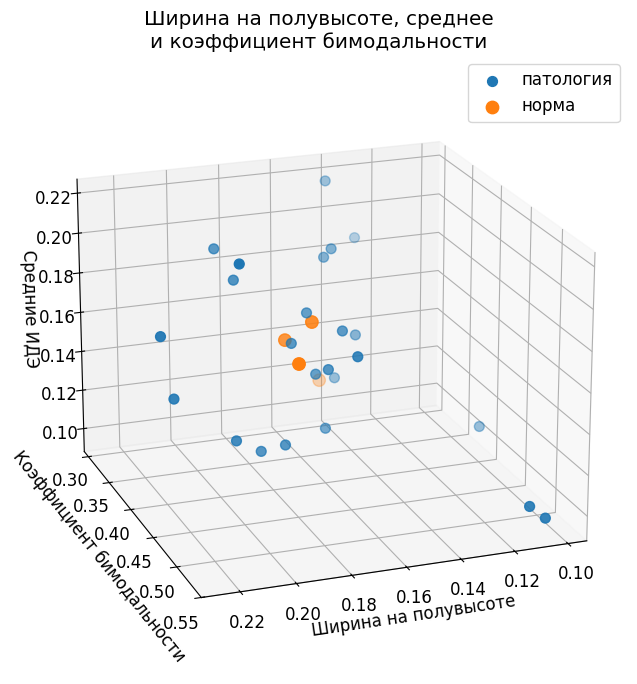

In [20]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(Whids[:-4], KBs[:-4], Means[:-4], s=50)
ax.scatter3D(Whids[-4:], KBs[-4:], Means[-4:], 'o', s=80)
ax.view_init(20, 70)
plt.title(f'Ширина на полувысоте, среднее\nи коэффициент бимодальности')
plt.xlabel('Ширина на полувысоте')
plt.ylabel('Коэффициент бимодальности')
ax.set_zlabel("Средние ИДЭ")
plt.legend(['патология', 'норма'])
plt.tight_layout()
plt.show()